<a href="https://colab.research.google.com/github/mariaeduardagimenes/NLP/blob/master/An%C3%A1lise_Sentimento_API_Twitter_DASA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análise de Sentimento no Twitter sobre Home Office**

Esse projeto consiste na Análise de sentimentos de tweets coletados através da API do Twitter sobre X.

O projeto consiste em:

1. Coleta de Tweets
2. Identificação de tweets mais curtidos e retweetados
3. Identificação da fonte dos tweets
4. Análise de sentimentos
5. Nuvem de palavras mais frequentes
6. Séries de tweets no tempo
8. Mapa de calor dos tweets utilizando a localização declada pelos usuários



**As keywords coletadas foram:**
- dasa
- nav
- app nav
- nav pro



**Utilizando o operador booleano OR**

keyword = ("'dasa' OR 'nav' OR 'app nav' OR nav pro")

**Pacotes Pyhton utilizados**

1. Tweepy
Acessa API do Twitter

2. Textblob
Análise sentimento

3. Scrapy
Scrappings

4. NLTK
Biblioteca NLP 

**Importação de pacotes**

In [125]:
#Pacotes básicos
import tweepy
import pandas as pd
import numpy as np
from textblob import TextBlob as tb 
import time
import re

#Pacotes para visualização
import matplotlib.pyplot as plt

#MAPA
from geopy.geocoders import Nominatim
import folium
from folium import plugins
from wordcloud import WordCloud, STOPWORDS






**TextBlob**

É usado para fazer análise de polaridade.

É pré-configurado na biblioteca para o idioma inglês para analisar se uma determinada frase em ingles, as palavras que a compoem são treinadas para falar se sao conotacao positiva ou negativa.

Não analisamos textos em português com ele.


**Folium**

Níveis de detalhamento.



In [126]:
# Credenciais para utilização da API do Twitter 

API_key = 'cM8lUpQVpI8gzndAZVxnNPtXV'
API_secret_key = 'RePiH9holSKvtMVsPkYllRUl1gkpomR2EJ3yqkiwTOlpvEhZ73'
access_token = '29108807-0pG1ooLldp5NNtkWmNmeBUvl854ggDDXlAF9pFdsz'
access_token_secret = 'cQZdSNFf0L3meDQQtC4lVt2YrJYigGtIlbI4I18aMYiRL'


**Autenticação na API do Twitter**

In [127]:
auth = tweepy.OAuthHandler(API_key, API_secret_key)
auth.set_access_token(access_token, access_token_secret)

# Construir API instance
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True,
                 retry_count=5,retry_delay=10)

onde:

- retry_count - número padrão de tentativas para tentar quando ocorrer um erro
- retry_delay - numero de segundos para aguardar entre tentativas
- wait_on_rate_limit - se deve ou nao esperar automaticamente a reposição dos limites de taxa
- wait_on_rate_limit_notify - imprima ou não uma notificação quando o Tweepy estiver aguardando a reposição dos limites de taxa

In [129]:
# Postar um Twitter diretamente do Python

api.update_status("Este tweet vemmmmmmmmmm  do Python! <3 Usando as APIs do TT - \n #datascience #datadriven")

# O tweet vai aparecer no meu feed.

Status(_api=<tweepy.api.API object at 0x7fb943f625d0>, _json={'created_at': 'Thu Jul 15 14:24:54 +0000 2021', 'id': 1415678764692869121, 'id_str': '1415678764692869121', 'text': 'Este tweet vemmmmmmmmmm  do Python! &lt;3 Usando as APIs do TT - \n #datascience #datadriven', 'truncated': False, 'entities': {'hashtags': [{'text': 'datascience', 'indices': [67, 79]}, {'text': 'datadriven', 'indices': [80, 91]}], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="https://www.igti.com.br/" rel="nofollow">Coleta IGTI Maria</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 29108807, 'id_str': '29108807', 'name': 'mary mary', 'screen_name': 'mariagimenes', 'location': 'Brazil', 'description': 'quem sou eu', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 245, 'friends_count': 413, 'listed_count': 3, '

**Coleta de dados (busca por palavra-chave)**

In [130]:
# Definir listas de armazenamento
tweets = []
info = []

In [131]:
#Definir que palavras (keyword) deseja pesquisar no Twitter

keyword = ("'dasa'")
# OR 'cadastro nav' OR 'nav app'")

Para realizar a busca por palavra chave vamos utilizar a função abaixo:

- API.search(q[,lang][,locale][,rpp][,page][,since_id][,geocode][,show_user])

**onde os principais parâmetros que serão usados são:**
- q : string de consulta de pesquisa
- lang : restringe os tweets para o idioma especificado, fornecido por um código iSO 6e 39-1.
    1) lang=pt -> português
    2) lang=en -> inglês
- rpp : o número de tweets a serem retornados por página, até no máximo 100
- page : o número da página (começando em 1) a ser retornado, até um máximo de aproximadamente 1500 resultados (com base na página rpp)
- since_id : retorna apenas status com um ID maior que (ou seja, mais recente que) o ID especificado
- geocode : retorna tweets de usuários localizados em um determinado
- show_user : quando verdadeiro, precede ":"no início do tweet. O padrao é falso

**Busca por palavra chave e recuperar os tweets em português**

In [132]:
for tweet in tweepy.Cursor(api.search,
                           q=keyword, tweet_mode='extended', 
                           rpp=200, result_type="mixed",lang='pt', #serão solicitados apenas 200 tweets nesta aula
                           include_entities=True).items(200): 
        
    if 'retweeted_status' in dir(tweet): # checa se retweet
        # se status é retweet, status.full_text (tweet.full_text) could be truncated.
        # deveriamos pegar retweeted_status.full_text
        aux=tweet.retweeted_status.full_text       
    else: # se não é retweet
        aux=tweet.full_text
        
    newtweet = aux.replace("\n", " ")
   
    tweets.append(newtweet) #serão armazenados nos vetores vazios criados
    info.append(tweet)   
    file = open("tweets_Keyword_dasaNav_pt.txt", "a", -1, "utf-8")    
    file.write(newtweet+'\n')
    file.close()

**Para verificar a quantidade de tweets coletados, use a função "len()"**

In [133]:
print("Total de tweets coletados %s." % (len(info)))

Total de tweets coletados 66.


In [171]:

# Primeiramente importamos as bibliotecas que serão utilizadas em nossa anáise:

import matplotlib.pyplot as plt
from nltk import word_tokenize
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
import re
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
import toolz as fp
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Criar data frame**

In [134]:
tweets_df = pd.DataFrame(tweets, columns=['Tweets']) 

tweets_df['len']  = np.array([len(tweet) for tweet in tweets])
tweets_df['ID']   = np.array([tweet.id for tweet in info])
tweets_df['USER']   = np.array([tweet.user.screen_name for tweet in info])
tweets_df['userName'] = np.array([tweet.user.name for tweet in info])
tweets_df['User Location']    = np.array([tweet.user.location for tweet in info])
tweets_df['Language'] = np.array([tweet.user.lang for tweet in info])
tweets_df['Date'] = np.array([tweet.created_at for tweet in info])
tweets_df['Source'] = np.array([tweet.source for tweet in info])
tweets_df['Likes']  = np.array([tweet.favorite_count for tweet in info])
tweets_df['Retweets']    = np.array([tweet.retweet_count for tweet in info])
tweets_df['Geo']    = np.array([tweet.geo for tweet in info])
tweets_df['Coordinates']    = np.array([tweet.coordinates for tweet in info])         
tweets_df['Place']    = np.array([tweet.place for tweet in info])

tweets_df.to_csv("tweets_Keyword_dasaNav_pt.csv")

In [172]:
tweets_df.head(10)

,Tweets,len,ID,USER,userName,User Location,Language,Date,Source,Likes,Retweets,Geo,Coordinates,Place
0,O teste clínico de fase 1/2 no Brasil será fin...,272,1415658467205996552,Ary_AntiPT,Ary ANTI PT,Brasil,None,2021-07-15 13:04:14,Twitter Web App,0,3,None,None,None
1,"26 de janeiro de 2021 Pedro de Godoy Bueno, p...",287,1415658424994516998,Ary_AntiPT,Ary ANTI PT,Brasil,None,2021-07-15 13:04:04,Twitter Web App,0,3,None,None,None
2,"A Dasa pertence à família Bueno, ex-dona da Am...",235,1415658405654638593,Ary_AntiPT,Ary ANTI PT,Brasil,None,2021-07-15 13:04:00,Twitter Web App,0,3,None,None,None
3,"Grupos como Vale, Gerdau, JBS, Oi, Vivo, Ambev...",265,1415658386067234821,Ary_AntiPT,Ary ANTI PT,Brasil,None,2021-07-15 13:03:55,Twitter Web App,0,4,None,None,None
4,PT querendo financiar uma nova milícia. https:...,63,1415655421474377728,dasa_advogados,DASA Advogados,"São Paulo, Goiânia e Manaus",None,2021-07-15 12:52:08,Twitter for iPhone,0,1633,None,None,None
5,"Miguel Diaz Canel, atual gerente da ilha-presi...",297,1415655400305831939,dasa_advogados,DASA Advogados,"São Paulo, Goiânia e Manaus",None,2021-07-15 12:52:03,Twitter for iPhone,0,1313,None,None,None
6,"Mais uma vez, essa parceria se une, em prol da...",246,1415655371084079112,dasa_advogados,DASA Advogados,"São Paulo, Goiânia e Manaus",None,2021-07-15 12:51:56,Twitter for iPhone,0,166,None,None,None
7,Se eu quisesse agradar esquerdista - teria fei...,87,1415655324686635013,dasa_advogados,DASA Advogados,"São Paulo, Goiânia e Manaus",None,2021-07-15 12:51:45,Twitter for iPhone,0,1488,None,None,None
8,Estive agora há pouco com o nosso PR @jairbols...,265,1415655307653623813,dasa_advogados,DASA Advogados,"São Paulo, Goiânia e Manaus",None,2021-07-15 12:51:41,Twitter for iPhone,0,1804,None,None,None
9,Felizmente o governo admitiu que os cálculos d...,280,1415655292738670593,dasa_advogados,DASA Advogados,"São Paulo, Goiânia e Manaus",None,2021-07-15 12:51:38,Twitter for iPhone,0,840,None,None,None


**Identificar os Top Tweets coletados**

In [136]:
# Tweets com maior número de LIKES
likes_max = np.max(tweets_df['Likes']) #Função max do numpy identifica o valor máximo

likes = tweets_df[tweets_df.Likes == likes_max].index[0] #pega o primeiro tweet com valor máximo de curtidas

print("O tweet com mais curtidas (likes) é: \n{}".format(tweets_df['Tweets'][likes]))
print("Número de curtidas: {}".format(likes_max))

O tweet com mais curtidas (likes) é: 
toda vez que eu abro o LinkedIn a DASA comprou mais uma rede de hospitais
Número de curtidas: 11


In [137]:
print(np.sum(tweets_df['Likes'] == likes_max)) #conta quantos tweets possuem o mesmo valor max

1


In [145]:
retweet_max  = np.max(tweets_df['Retweets']) #retorna o valor máximo

retweet  = tweets_df[tweets_df.Retweets == retweet_max].index[0] #pega o primeiro tweet com valor máximo de Retweets

print("O tweet com mais retweet é: \n{}".format(tweets_df['Tweets'][retweet]))
print("Número de retweets: {}".format(retweet_max))

O tweet com mais retweet é: 
- Redução de impostos do Diesel - Nova redução de impostos dos games - Desestatização da Eletrobrás - Câmara propõe e aprova PL que acaba com os supersalários  O BRASIL NÃO SERÁ UMA NOVA CUBA!
Número de retweets: 12212


**Identifica a fonte(origem) do tweet**

Nesse caso, app ou dispositivo onde o usuário postou o tweet

In [146]:
sources = [] #lista para armazenar a fontes
for source in tweets_df['Source']:
    if source not in sources:
        sources.append(source) #inclui no vetor sources apenas se a fonte encontrada ainda não foi incluída

percent = np.zeros(len(sources)) #Retorna um novo vetor, com o número de elementos do vetor sources, preenchido com zeros a new array filled with zeros, for

for source in tweets_df['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

**Gráfico que exibe o número de tweets por fonte**

In [148]:
sourceDF = pd.DataFrame({
 'source':percent,
}, index=sources)

sourceDF

,source
Twitter Web App,8.0
Twitter for iPhone,41.0
Twitter for Android,17.0


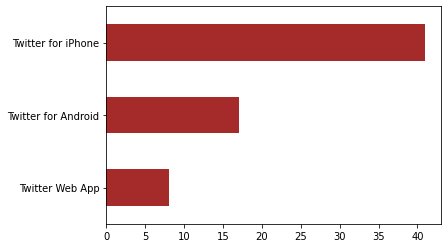

In [149]:
sources_sorted = sourceDF.sort_values('source',ascending=True)
ax = sources_sorted.source.plot(kind='barh',color='#A52A2A')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

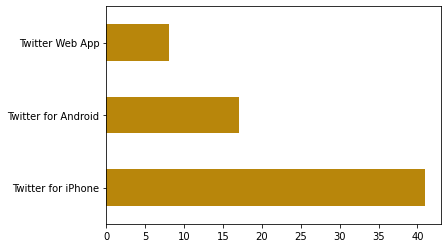

In [150]:
sources_sorted = sourceDF.sort_values('source',ascending=False)
ax = sources_sorted.source.plot(kind='barh',color='#B8860B')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

Mais usuários usam Android.

**Análise de Polaridade**

In [151]:
#Variável que irá armazenar as polaridades
analysis = None
# Lista vazia para armazenar as polaridades
polarities = []

In [152]:
tweets_df.head()

,Tweets,len,ID,USER,userName,User Location,Language,Date,Source,Likes,Retweets,Geo,Coordinates,Place
0,O teste clínico de fase 1/2 no Brasil será fin...,272,1415658467205996552,Ary_AntiPT,Ary ANTI PT,Brasil,None,2021-07-15 13:04:14,Twitter Web App,0,3,None,None,None
1,"26 de janeiro de 2021 Pedro de Godoy Bueno, p...",287,1415658424994516998,Ary_AntiPT,Ary ANTI PT,Brasil,None,2021-07-15 13:04:04,Twitter Web App,0,3,None,None,None
2,"A Dasa pertence à família Bueno, ex-dona da Am...",235,1415658405654638593,Ary_AntiPT,Ary ANTI PT,Brasil,None,2021-07-15 13:04:00,Twitter Web App,0,3,None,None,None
3,"Grupos como Vale, Gerdau, JBS, Oi, Vivo, Ambev...",265,1415658386067234821,Ary_AntiPT,Ary ANTI PT,Brasil,None,2021-07-15 13:03:55,Twitter Web App,0,4,None,None,None
4,PT querendo financiar uma nova milícia. https:...,63,1415655421474377728,dasa_advogados,DASA Advogados,"São Paulo, Goiânia e Manaus",None,2021-07-15 12:52:08,Twitter for iPhone,0,1633,None,None,None


**Polaridade para tweets em português**

In [153]:
!pip install unidecode

In [154]:
pip install git+https://github.com/BoseCorp/py-googletrans.git --upgrade


  Cloning https://github.com/BoseCorp/py-googletrans.git to /tmp/pip-req-build-ebv5qj_x
  Running command git clone -q https://github.com/BoseCorp/py-googletrans.git /tmp/pip-req-build-ebv5qj_x
  Created wheel for googletrans: filename=googletrans-2.3.0-cp37-none-any.whl size=16461 sha256=77c49d044eb1bb469a763ea8a7fe26b0f3d4e5b0d48868dd6b1a29fff7cc2781
  Stored in directory: /tmp/pip-ephem-wheel-cache-05ck0g0o/wheels/6a/fc/9e/2d31d95d9e97da5166afd8225a6f3b6850dc2c6e84accefbfc
Successfully built googletrans
  Found existing installation: googletrans 2.3.0
    Uninstalling googletrans-2.3.0:
      Successfully uninstalled googletrans-2.3.0


In [155]:

from googletrans import Translator
from unidecode import unidecode

**Um exemplo de tradução**



In [169]:
dasa = tweets_df['Tweets']
print(dasa)

0     O teste clínico de fase 1/2 no Brasil será fin...
1     26 de janeiro de 2021  Pedro de Godoy Bueno, p...
2     A Dasa pertence à família Bueno, ex-dona da Am...
3     Grupos como Vale, Gerdau, JBS, Oi, Vivo, Ambev...
4     PT querendo financiar uma nova milícia. https:...
                            ...                        
61    @angeljinnie_ @BTS_twt @pjmkyan QU SUSTO DASA ...
62                                     @lzfelp58 n dasa
63                                  @jupinguim_ A Dasa!
64          @Rouxinolzinho É na área da saúde, é a Dasa
65    Acertei 35 questões de 40, aí a DASA pede duas...
Name: Tweets, Length: 66, dtype: object


In [173]:
tweets_df.shape

(66, 14)

In [176]:
tweets_df.Likes.value_counts()


0     57
1      5
11     1
8      1
6      1
2      1
Name: Likes, dtype: int64

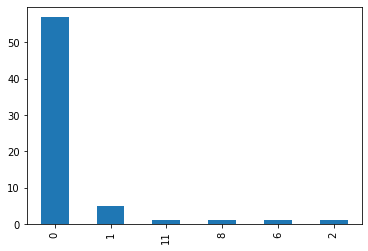

In [178]:

# Visualizando esses dados graficamente:
tweets_df.Likes.value_counts().plot(kind='bar')

In [181]:
np.random.seed(42)
df = (tweets_df
               .rename(columns={"Date": "data_publicacao",
                                "Tweets": "tweet",                                
                                "Retweets" : "num_retweets",
                                "userName": "usuário",
                                "Likes": "sentimento",
                                "User Location": "cidade"})
               .loc[:, ["data_publicacao", "tweet", "num_retweets",  "usuário", "sentimento"]])
df["data_publicacao"] = pd.to_datetime(df["data_publicacao"],infer_datetime_format=True)

In [183]:
print(df)

       data_publicacao  ... sentimento
0  2021-07-15 13:04:14  ...          0
1  2021-07-15 13:04:04  ...          0
2  2021-07-15 13:04:00  ...          0
3  2021-07-15 13:03:55  ...          0
4  2021-07-15 12:52:08  ...          0
..                 ...  ...        ...
61 2021-07-13 06:24:50  ...          0
62 2021-07-13 05:45:53  ...          0
63 2021-07-13 04:16:19  ...          1
64 2021-07-13 04:14:20  ...          0
65 2021-07-13 04:02:15  ...          0

[66 rows x 5 columns]


In [184]:
df.tweet.count()


66

In [185]:
df.drop_duplicates(['tweet'], inplace=True)


In [186]:
df.tweet.count()


65

In [187]:
tweets = df['tweet']
classes = df['sentimento']

In [188]:
# Overview

df.groupby("sentimento").count()

,data_publicacao,tweet,num_retweets,usuário
sentimento,,,,
0,57,57,57,57
1,5,5,5,5
2,1,1,1,1
6,1,1,1,1
11,1,1,1,1


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


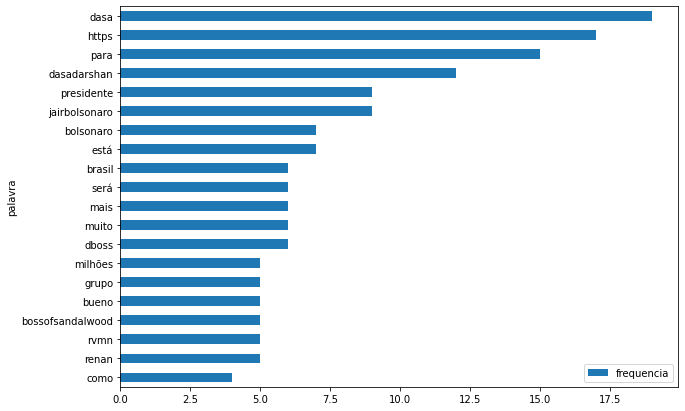

In [189]:
import nltk
nltk.download('punkt')

tweet_words = nltk.tokenize.word_tokenize(df["tweet"].drop_duplicates().str.lower().str.cat(sep=" ")) # separa em palavras
word_dist = fp.pipe(fp.keyfilter(lambda x: len(x) > 3, nltk.FreqDist(tweet_words)), # apenas palavras com mais de 3 caracteres
                    nltk.probability.FreqDist)

fig, ax = plt.subplots(figsize=(10, 7))

(pd.DataFrame(word_dist.most_common(20)[::-1],
              columns=['palavra', 'frequencia'])
    .plot.barh(x="palavra", y="frequencia", ax=ax));

In [191]:
# Remover Stopwords

# Stopwords são palavras que não tem relevância para o sentido do texto, ex: uma, um, com, de, que, etc

# nltk possui uma lista de stopwords em 16 idiomas diferentes, e nós vamos criar a função RemoveStopWords() para remover as stopwords em português

def RemoveStopWords(instancia):
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [192]:
# Stemming


def Stemming(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    palavras = []
    for w in instancia.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))


In [193]:

# Remover caracteres indesejados, como links, etc

def Limpeza_dados(instancia):
    # remove links, pontos, virgulas,ponto e virgulas dos tweets
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    return (instancia)

In [194]:
def Preprocessing(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','').replace('"','')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [195]:
tweets = [Preprocessing(i) for i in tweets]


In [196]:
tweets[:10]


['teste clínico fase 1/2 brasil financiado parte aporte r$ 15 milhões dasa grupo mafra hospitalar outros r$ 15 milhões empresas mrv ( dono cnn @cnnbrasil , localiza ( salim mattar @salimmattar banco inter',
 '26 janeiro 2021 pedro godoy bueno, presidente grupo dasa, negou meio nota enviada imprensa informação estaria “liderando” negociações importação lote 33 milhões doses vacina astrazeneca contra covid19',
 'dasa pertence família bueno, exdona amil atuais controladores grupo pedro godoy bueno camila grossi, filhos falecido empresário edson bueno, junto primeira esposa, dulce pugliese, fundaram amil',
 'grupos vale, gerdau, jbs, oi, vivo, ambev, petrobras, santander, itaú, claro, whirlpool adn liga participaram reuniões governo bolsonaro p encomendar 33 milhões doses vacina oxford/astrazeneca pedro godoy bueno camila grossi grupo dasa',
 'pt querendo financiar nova milícia',
 'miguel diaz canel, atual gerente ilhapresidio, mostrou deve agir melhor aluno fidel raul castro acusou manife

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


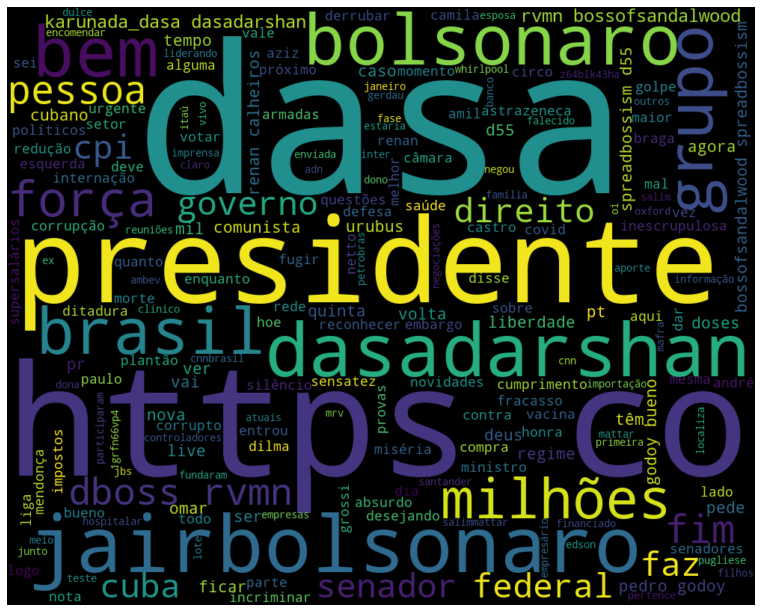

In [197]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
nltk

stopwordsPOR = nltk.corpus.stopwords.words('portuguese')

stopwordsPOR

words1 = []
for i in df.tweet:
    for p in i.lower().split():
        if p not in stopwordsPOR and p not in tweets:
         
            words1.append(p)
            
#convert list to string and generate
unique_string=(" ").join(words1)

wordcloud = WordCloud(width=1000, height=800, margin=0).generate(unique_string)
plt.figure(figsize=(20,11))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.margins(x=0, y=0)

In [198]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

df["tokens"] = df["tweet"].apply(tokenizer.tokenize)
df.head()

,data_publicacao,tweet,num_retweets,usuário,sentimento,tokens
0,2021-07-15 13:04:14,O teste clínico de fase 1/2 no Brasil será fin...,3,Ary ANTI PT,0,"[O, teste, clínico, de, fase, 1, 2, no, Brasil..."
1,2021-07-15 13:04:04,"26 de janeiro de 2021 Pedro de Godoy Bueno, p...",3,Ary ANTI PT,0,"[26, de, janeiro, de, 2021, Pedro, de, Godoy, ..."
2,2021-07-15 13:04:00,"A Dasa pertence à família Bueno, ex-dona da Am...",3,Ary ANTI PT,0,"[A, Dasa, pertence, à, família, Bueno, ex, don..."
3,2021-07-15 13:03:55,"Grupos como Vale, Gerdau, JBS, Oi, Vivo, Ambev...",4,Ary ANTI PT,0,"[Grupos, como, Vale, Gerdau, JBS, Oi, Vivo, Am..."
4,2021-07-15 12:52:08,PT querendo financiar uma nova milícia. https:...,1633,DASA Advogados,0,"[PT, querendo, financiar, uma, nova, milícia, ..."


In [203]:
!pip install to_categorical

ERROR: Could not find a version that satisfies the requirement to_categorical (from versions: none)
ERROR: No matching distribution found for to_categorical


In [205]:

#Visualizar o número e tamanho dos tweets

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from tensorflow.keras import utils as np_utils
import keras
import keras.utils


all_words = [word for tokens in df["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in df["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s palavras no total, com um vocabulário de tamanho %s" % (len(all_words), len(VOCAB)))
print("O comprimento máximo de frase é %s" % max(sentence_lengths))

1670 palavras no total, com um vocabulário de tamanho 895
O comprimento máximo de frase é 52


In [206]:
tokens = df["tokens"]


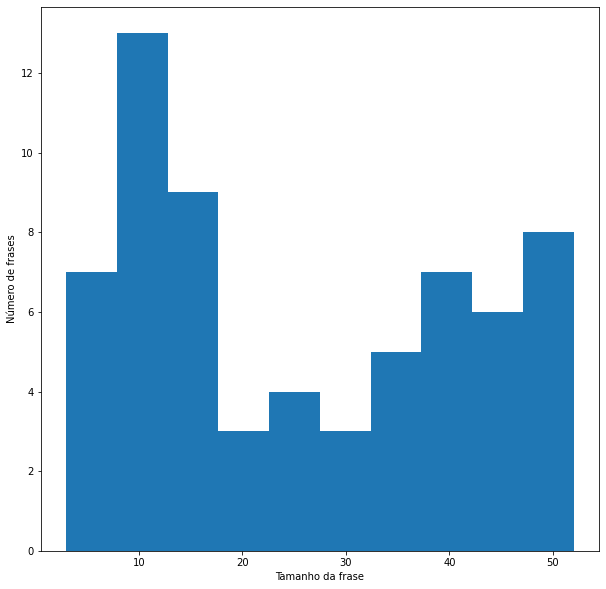

In [207]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Tamanho da frase')
plt.ylabel('Número de frases')
plt.hist(sentence_lengths)
plt.show()

In [208]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

In [209]:
vectorizer = CountVectorizer(analyzer="word")


In [210]:
freq_tweets = vectorizer.fit_transform(tweets)
type(freq_tweets)

scipy.sparse.csr.csr_matrix

In [211]:
freq_tweets.shape

(65, 712)

In [212]:
modelo = MultinomialNB()
modelo.fit(freq_tweets,classes)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [213]:
testes = ['Esse governo está no início, vamos ver o que vai dar',
          'Estou muito feliz com o governo de Minas esse ano',
          'O estado de Minas Gerais decretou calamidade financeira!!!',
          'A segurança desse país está deixando a desejar',
          'O governador de Minas é mais uma vez do PT']

In [215]:
# vectorizer.transform() transforma os dados de teste em vetores de palavras:
freq_testes = vectorizer.transform(testes)

In [216]:
modelo.predict(freq_testes)


array([0, 0, 0, 0, 0])

In [217]:
for t, c in zip (testes,modelo.predict(freq_testes)):
    # t representa o tweet e c a classificação de cada tweet.
    print (t +", "+ c) 
    

TypeError: ignored

In [218]:
print(modelo.classes_)
modelo.predict_proba(freq_testes).round(2)


[ 0  1  2  6 11]


array([[0.99, 0.01, 0.  , 0.  , 0.  ],
       [0.94, 0.04, 0.01, 0.01, 0.01],
       [0.85, 0.09, 0.02, 0.02, 0.02],
       [0.87, 0.08, 0.02, 0.02, 0.02],
       [0.91, 0.05, 0.01, 0.01, 0.02]])

In [219]:

# Vetorizando os dados e passando o classificador:

from sklearn.pipeline import Pipeline
pipeline_simples = Pipeline([
  ('counts', CountVectorizer()),
  ('classifier', MultinomialNB())
])
pipeline_simples.fit(tweets,classes)

Pipeline(memory=None,
         steps=[('counts',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [220]:

# Para implementar a validação do modelo, vamos usar a função cross_val_predict()

resultados = cross_val_predict(modelo, freq_tweets, classes, cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [221]:
metrics.accuracy_score(classes,resultados)


0.2

In [223]:

# Medidas de validação do modelo:
sentimento=[0,1,2,6,11]
print (metrics.classification_report(classes,resultados,sentimento))

              precision    recall  f1-score   support

           0       0.75      0.21      0.33        57
           1       0.02      0.20      0.04         5
           2       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1

    accuracy                           0.20        65
   macro avg       0.15      0.08      0.07        65
weighted avg       0.66      0.20      0.29        65



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [224]:
print (pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))


Predito   0   1  2  All
Real                   
0        12  45  0   57
1         3   1  1    5
2         0   1  0    1
6         1   0  0    1
11        0   1  0    1
All      16  48  1   65


In [225]:

# Função para automatizar todo o processo acima:
def Metricas(modelo, tweets, classes):
  resultados = cross_val_predict(modelo, tweets, classes, cv=10)
  return 'Acurácia do modelo: {}'.format(metrics.accuracy_score(classes,resultados))

# Naive Bayes simples- acurácia do modelo:
Metricas(pipeline_simples,tweets,classes)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


'Acurácia do modelo: 0.8307692307692308'

In [59]:
!pip install django

     |████████████████████████████████| 7.9MB 8.6MB/s 


In [166]:
regex='.*?\w+.*?\d{4}.*?\w'
result=re.match(regex,dasa)
if result!=None:
    print(result.group())
else:
    print('None')

26 de janeiro de 2021  P


In [167]:
textPT = unidecode(dasa)
#textEN = Translator().translate(textPT)
print(textPT)

26 de janeiro de 2021  Pedro de Godoy Bueno, presidente do grupo Dasa, negou por meio de nota enviada a imprensa a informacao de que estaria "liderando" as negociacoes para a importacao de um lote de 33 milhoes de doses da vacina da AstraZeneca contra a Covid-19. https://t.co/1gRfN66vp4


In [168]:
textEN = Translator().translate(textPT)

AttributeError: ignored

In [84]:
textEN.text

AttributeError: ignored

In [ ]:
analysis = tb(textEN.text)    
    #Calculando a polaridade do texto traduzido
polarity = analysis.sentiment.polarity #analisa a polaridade  
polarity

0.0

In [85]:
for tweet in tweets_df['Tweets']: #para cada tweet lido foi passar por unicode
    #Texto do Tweet
    textPT = unidecode(tweet)
    
    #vou Traduzir para o Inglês
    textEN = Translator().translate(textPT)
    
    analysis = tb(textEN.text) #usar TextBlob    
    #Calculando a polaridade do texto traduzido
    polarity = analysis.sentiment.polarity #analisa a polaridade  
    polarities.append(polarity) #add polaridade de cada tweet no vetor polaridades

AttributeError: ignored

In [86]:
tweets_df.head(3)

,Tweets,len,ID,USER,userName,User Location,Language,Date,Source,Likes,Retweets,Geo,Coordinates,Place
0,🧡🧡🧡✨🤩😍✨🧡🧡🧡 🤩✨ Quem é o seu ✨😍 ✨😍 melhor a...,196,1415388485943447562,shopee_br,Shopee Brasil,Brasil,None,2021-07-14 19:11:26,Twitter Web App,935,469,None,None,None
1,Baixei o app pra vê se dou uma mamada e as gay...,68,1415051945916739589,samiraclose,sαмı,Brasil,None,2021-07-13 20:54:08,Twitter for iPhone,16415,466,None,None,None
2,Só 3% dos réus com foro privilegiado foram con...,262,1415272434098262020,deltanmd,Deltan Dallagnol,Curitiba/PR,None,2021-07-14 11:30:17,Etus Brasil,2661,564,None,None,None


In [ ]:
print('Vetor de polaridade:',polarities)

Vetor de polaridade: [0.11161616161616161, 0.11161616161616161, 0.0, 0.0, -0.05, 0.47, 0.0625, -0.125, 0.25, 0.2681818181818182, -0.07, 0.0, 0.2333333333333333, 0.0, 0.03333333333333333, 0.225, 0.0, -0.022857142857142864, 0.3583333333333334, 0.0, -0.3, 0.6, 0.03333333333333333, 0.03333333333333333, 0.375, 0.0, 0.21875, 0.0, 0.0, -0.033333333333333326, -0.5666666666666668, 0.3516666666666666, 0.0, 0.0, 0.0, -0.5, 0.27499999999999997, 0.43333333333333335, 0.0, 0.0, 0.24999999999999997, -0.04642857142857142, 0.2, 0.0, 0.09166666666666667, 0.7, -0.012499999999999997, 0.10208333333333333, 1.0, -0.05, -0.25, 0.43333333333333335, 0.125, 0.009090909090909115, -0.1, 0.25, 0.15625, 0.15, 0.0625, 0.43333333333333335, 0.4000000000000001, 0.16666666666666666, 0.25, 0.009090909090909115, 0.15000000000000002, 0.009090909090909115, 0.43333333333333335, 0.0, -0.039999999999999994, 0.4166666666666667, 0.037500000000000006, 0.5666666666666667, 0.0, 0.10000000000000002, 0.0, 0.26666666666666666, -0.2, 0.0

**Análise de Sentimento**

In [87]:
print('Para a(s) palavra(s):"%s"' % keyword)
print('A MÉDIA DE SENTIMENTO É: ' + str(np.mean(polarities)))

Para a(s) palavra(s):"dasa"
A MÉDIA DE SENTIMENTO É: nan


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [88]:
positive = 0
negative = 0
neutral = 0

for polarity in polarities:
    if polarity > 0:
        positive = positive+1
    elif polarity < 0:
        negative = negative+1
    else:
        neutral = neutral+1           

#calcula percentual
pos_pct=positive*100/len(polarities)
neg_pct=negative*100/len(polarities)
neu_pct=neutral*100/len(polarities)

ZeroDivisionError: ignored

In [89]:
sentiments = ['Positivos', 'Negativos','Neutros']
percents = [pos_pct, neg_pct, neu_pct]

NameError: ignored

In [90]:
explode = (0.1, 0, 0) #Separa o primeiro

pie_chart = pd.Series(percents, index=sentiments,name='')
pie_chart.plot.pie(fontsize=12, explode=explode, autopct='%.2f%%', shadow=True,
                   figsize=(5, 5),title="Análise de Sentimentos tweets");

NameError: ignored

In [ ]:
tweets_df

,Tweets,len,ID,USER,userName,User Location,Language,Date,Source,Likes,Retweets,Geo,Coordinates,Place
0,"5 meses depois, em uma quarentena rígida e mui...",236,1293731010618638339,quarentena_bot,Quarentena,Planeta Terra,None,2020-08-13 02:08:03,QuarentenaBot,0,1,None,None,None
1,"5 meses depois, em uma quarentena rígida e mui...",236,1293730988724350976,pedromaganem,Pedro Magalhães Ganem,,None,2020-08-13 02:07:58,Instagram,0,1,None,None,None
2,Home Office - Dicas para ser produtivo no trab...,84,1293730285830516736,empregobrasil,Emprego Brasil,Brasil,None,2020-08-13 02:05:11,EmpregoBrasil,0,0,None,None,None
3,a coisa mais ESTRANHA do home office é que ter...,160,1293705463540985856,amywinehazi,haziel,"Florianópolis, Brazil",None,2020-08-13 00:26:33,Twitter for iPhone,14,0,None,None,None
4,@lwtnights Isso deveria ser desculpa? O trabal...,267,1293690840452411392,firexsevilla,ᴄʟᴀʀᴀ 🦋🇧🇷,"Manaus, Brasil",None,2020-08-12 23:28:26,Twitter for Android,0,0,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,"""o home office tirou algo terrivel que tbm nos...",302,1291225185975242753,BlueTrouble02,Trouble_blue,Brasil,None,2020-08-06 04:10:48,Twitter for Android,0,5487,None,None,None
196,O home office tirou algo terrivel que tbm nos ...,276,1291222063756316672,alainpetterson,Faixa branca da vida,"Santiago, Chile",None,2020-08-06 03:58:24,Twitter for Android,0,1424,None,None,None
197,No home office a gente trabalha em casa ou a g...,69,1291216118867283970,brsneuro,Prof. Bruno Rezende de Souza,"Belo Horizonte, Brasil",None,2020-08-06 03:34:47,Twitter for Android,22,4,None,None,None
198,O home office tirou algo terrivel que tbm nos ...,300,1291206345035784192,LauraPassarella,Laura,"Santo André, Brasil",None,2020-08-06 02:55:56,Twitter for Android,0,113,None,None,None


**Mapa de calor dos tweets**

In [ ]:
#MAPA
from geopy.geocoders import Nominatim
import folium
from folium import plugins

In [ ]:
geolocator = Nominatim(user_agent="TweetsSentiments")

latitude = []
longitude = []

for user_location in tweets_df['User Location']:
    try:
        location = geolocator.geocode(user_location)
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    except:
        continue

In [ ]:
coordenadas = np.column_stack((latitude, longitude))

mapa = folium.Map(zoom_start=3.)
mapa.add_child(plugins.HeatMap(coordenadas))
mapa.save('Mapa_Calor_homeoffice_pt.html')
mapa

**WordCloud**

In [ ]:
from wordcloud import WordCloud

In [ ]:
words = ' '.join(tweets_df['Tweets']) #transformando pra string

words_clean = " ".join([word for word in words.split()
                            if 'https' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])

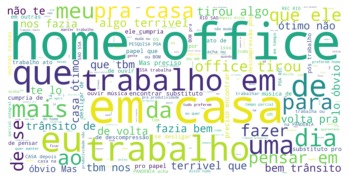

In [ ]:
import warnings

warnings.simplefilter('ignore')

wc = WordCloud(min_font_size=10, 
               max_font_size=300, 
               background_color='white', 
               mode="RGB",
               width=2000, 
               height=1000,
               normalize_plurals= True).generate(words_clean)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig('homeoffice_cloud_pt.png', dpi=300)
plt.show()

**Análise Temporal dos tweets**

In [ ]:
#tweets postados por dia
data = tweets_df

In [ ]:
print(data['Date'][0])

2020-08-13 02:08:03


In [ ]:
from datetime import datetime

In [ ]:
#tweets postados por dia

data = tweets_df

print(data['Date'][0])

data['Date'] = pd.to_datetime(data['Date']).apply(lambda x: x.date())

print(data['Date'][0])

2020-08-13 02:08:03
2020-08-13


In [ ]:
x = data['Date'].value_counts() #conta q qtd de tweets por dia

x

2020-08-07    39
2020-08-10    39
2020-08-06    34
2020-08-11    32
2020-08-12    23
2020-08-08    15
2020-08-09    14
2020-08-13     4
Name: Date, dtype: int64

In [ ]:
tlen = pd.Series(data['Date'].value_counts(), index=data['Date'])

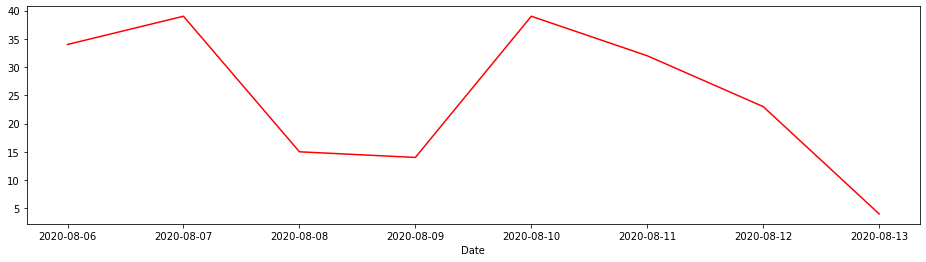

In [ ]:
tlen.plot(figsize=(16,4), color='r')